 <h1>A NOTEBOOK FOR PROJECT ABOUT COVID-19 DETECTION BY USING DEEP LEARNING CNN(CONV NEURAL NETWORK) -A COLLEGE PROJECT -BOOTCAMP 2021<h1>

[![Gender-Based Violence](https://www.tpp-rating.org/public/uploads/publications/34/5eac0b566c867covid-19.jpg)](https://github.com/innocoder-official?tab=repositories)

<h2>MOUNTING DRIVE<h2>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h2>UNZIPPING THE DATASET<h2>

In [2]:
!unzip "/content/drive/MyDrive/DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2.zip"

Streaming output truncated to the last 5000 lines.
 extracting: DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Train/normal/Normal-1451.png  
 extracting: DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Train/normal/Normal-1452.png  
 extracting: DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Train/normal/Normal-1453.png  
 extracting: DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Train/normal/Normal-1454.png  
 extracting: DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Train/normal/Normal-1455.png  
 extracting: DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Train/normal/Normal-1456.png  
 extracting: DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Train/normal/Normal-1457.png  
 extracting: DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Train/normal/Normal-1458.png  
 extracting: DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Train/normal/Normal-1459.png  
 extracting: DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Train/normal/Normal-

<h2>IMPORTING THE LIBRARY<h2>

In [3]:
#Importing the important library
import matplotlib.pyplot as plt
import keras 
import numpy as np
import seaborn as sns
from keras.layers import *
from keras.models import *
from keras_preprocessing import image
from keras import metrics
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


<h2>LOADING THE DATA<h2>

In [4]:
#LOADING THE DATA 
TRAIN_PATH="/content/DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Train"
VAL_PATH="/content/DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Validation "
TEST_PATH="/content/DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Test"


<h2>BUILDING THE MODEL<h2>

In [5]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(244,244,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2,activation="sigmoid"))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer="adam",metrics=['accuracy'])

In [6]:
#Getting the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 242, 242, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 240, 240, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 120, 120, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 120, 120, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 118, 118, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 59, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 59, 59, 64)        0

<h2>DATA AUGUMENTATION BY IMAGEDATAGENERATOR<h2>

In [7]:
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)#for train image,here is where agumentation takes place

test_dataset=image.ImageDataGenerator(rescale=1./255) #for test image,no need for agumentation 
TEST_DATASET=image.ImageDataGenerator(rescale=1./255) #for test image ,no need for agumentation 


In [8]:
#generating the train data
train_generator=train_datagen.flow_from_directory(directory=TRAIN_PATH,target_size=(244,244))

Found 7000 images belonging to 2 classes.


In [9]:
#getting the classes 
train_generator.class_indices

{'covid': 0, 'normal': 1}

In [10]:
#splitting into train image and the class
t_img , label = train_generator.next()

In [11]:
#function to print the image for train image
def plotImages(img_arr, label):

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'RdYlBu')
    plt.colorbar()
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    

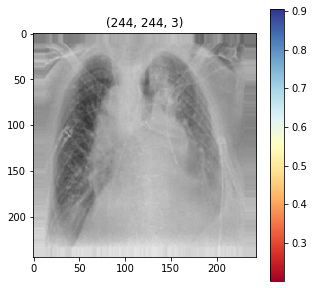

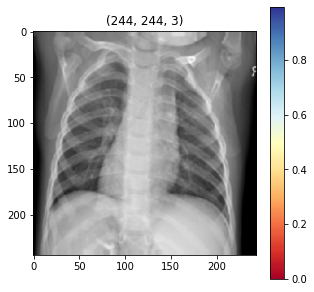

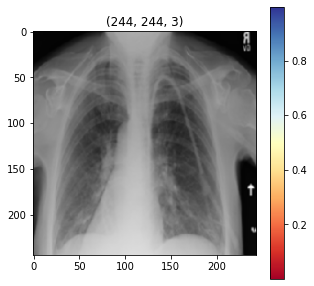

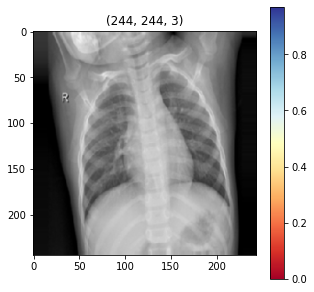

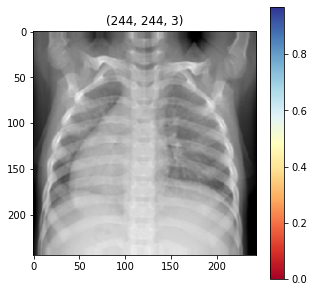

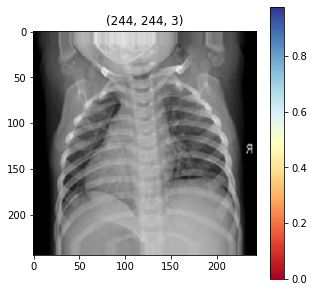

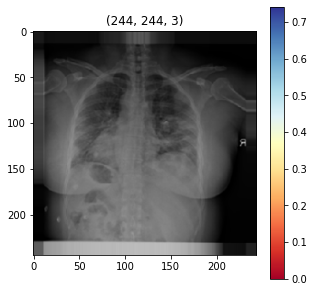

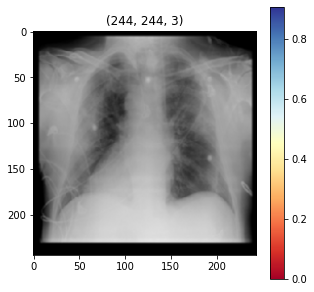

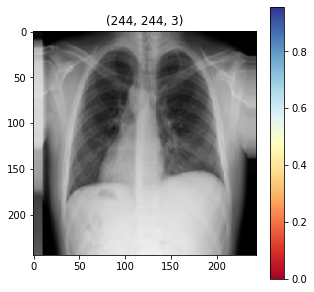

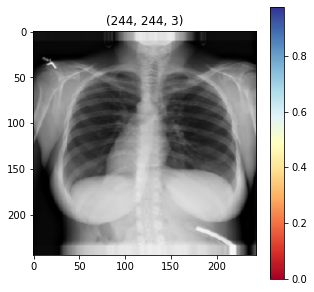

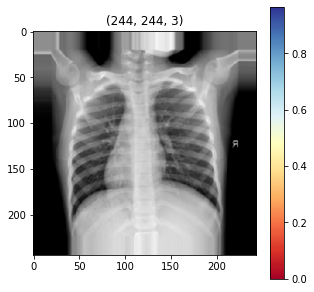

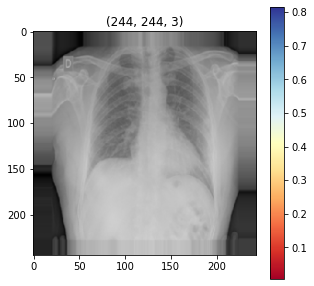

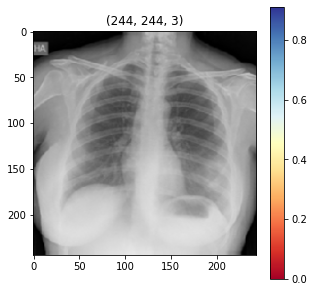

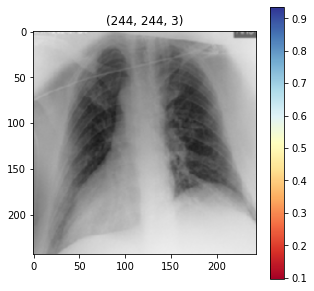

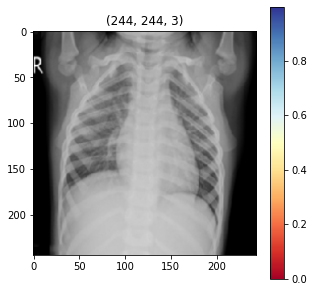

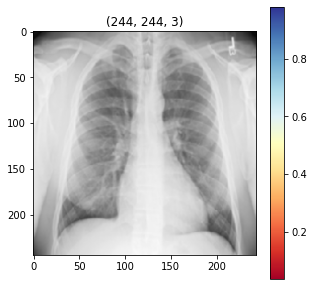

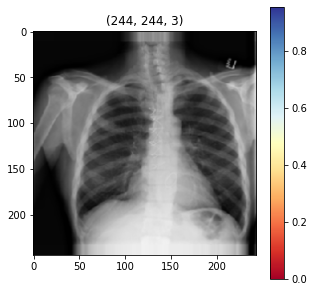

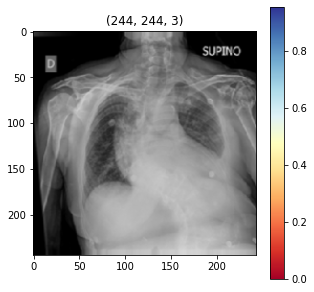

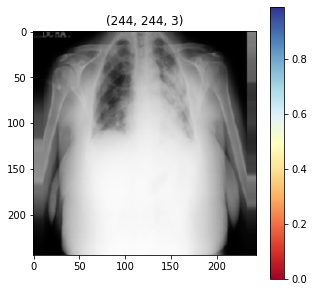

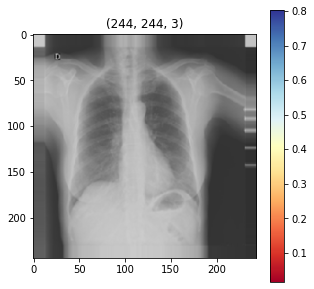

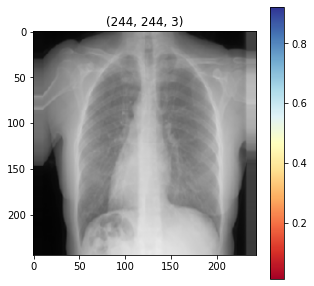

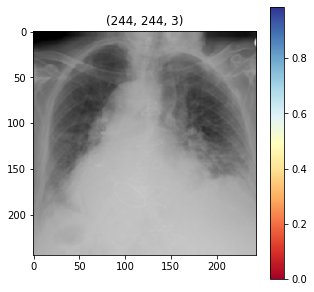

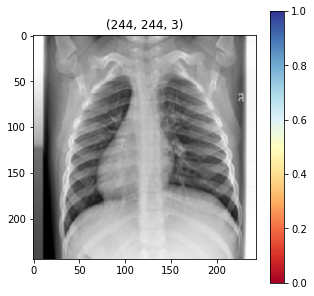

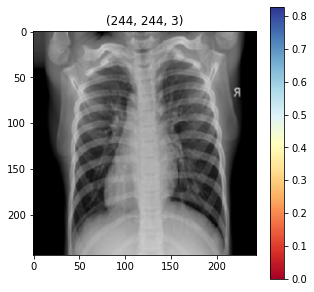

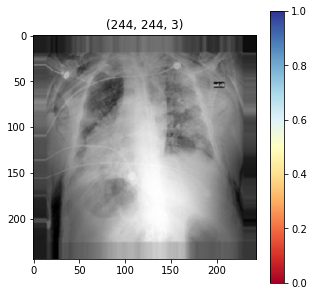

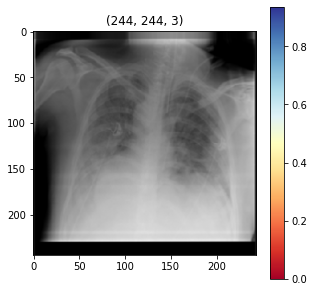

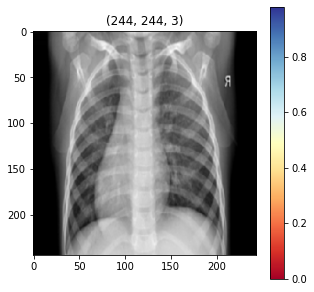

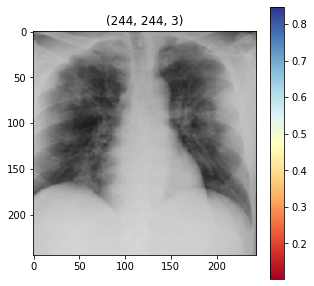

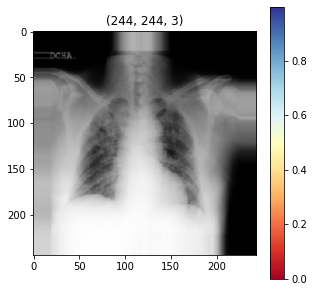

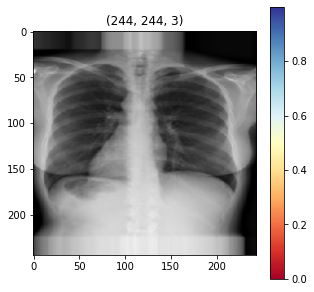

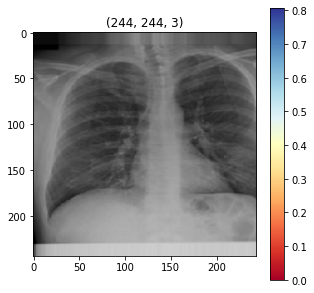

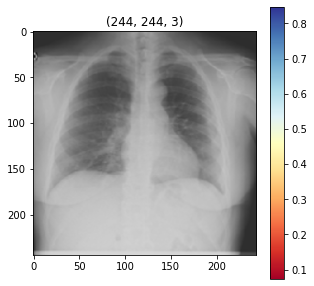


 None


In [12]:
#calling the function to print 
print("\n",plotImages(t_img, label))

In [13]:
#generating image for the validation 
validation_generator=test_dataset.flow_from_directory(directory=VAL_PATH,target_size=(244,244))

Found 2000 images belonging to 2 classes.


In [14]:
#checking the classes 
validation_generator.class_indices

{'covid': 0, 'normal': 1}

In [15]:
#splitting into validation image and the class(label) for the validation generator
t_img , label = validation_generator.next()

In [16]:
#function to plot the validation images
def plotImages(img_arr, label):

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'RdYlBu')
    plt.colorbar()
    plt.title(im.shape)
    plt.axis = False
    plt.show()


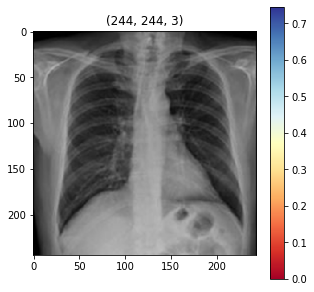

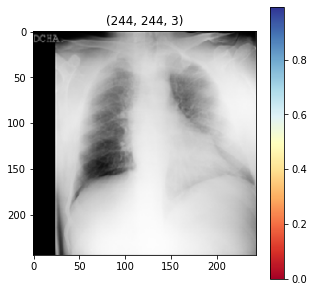

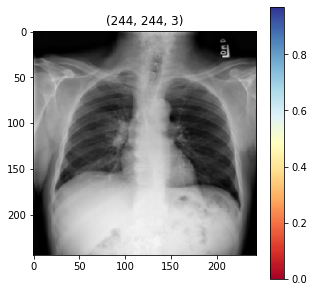

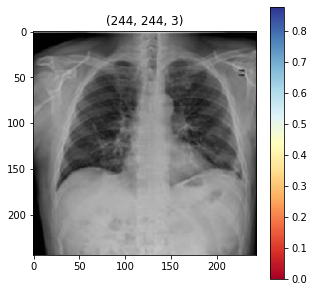

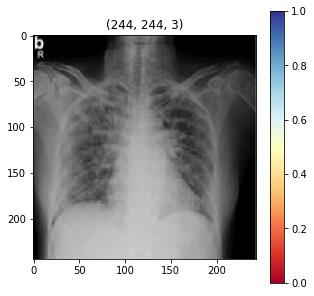

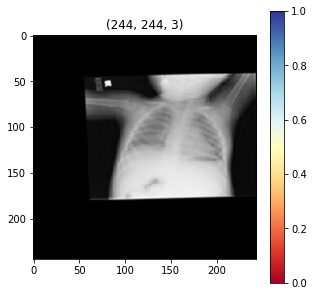

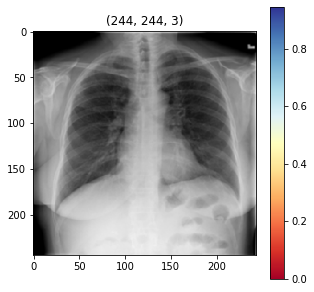

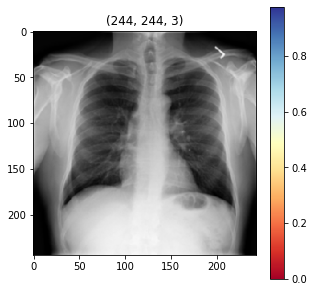

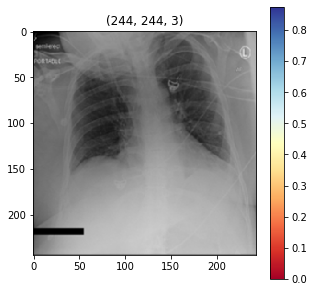

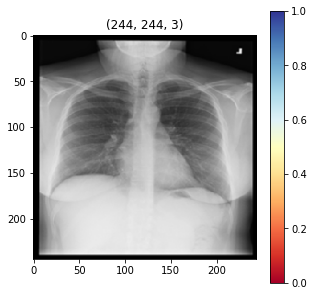

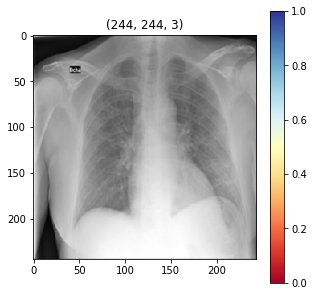

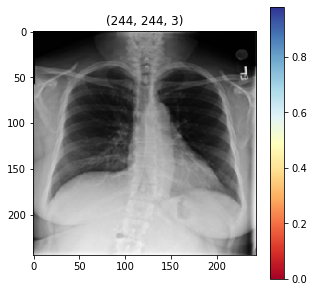

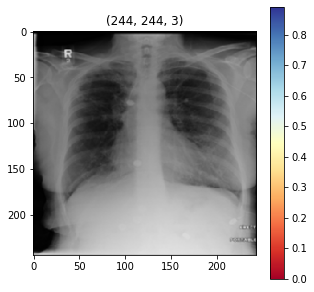

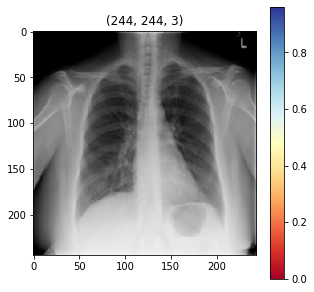

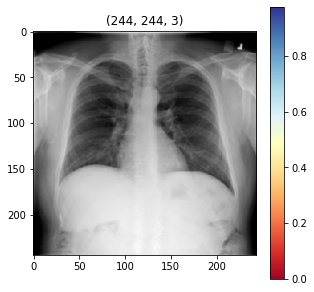

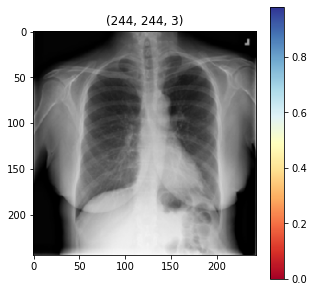

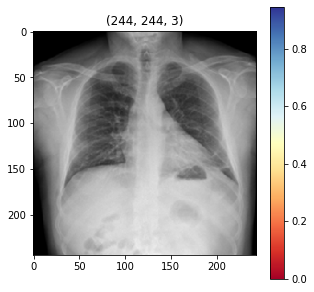

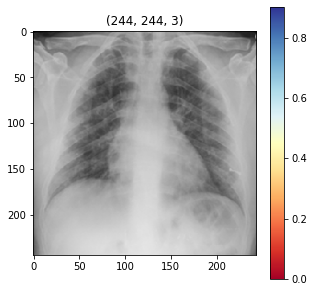

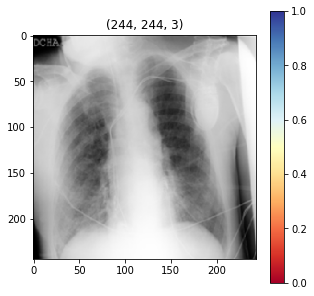

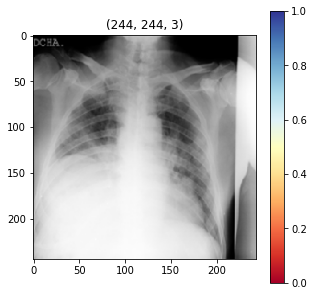

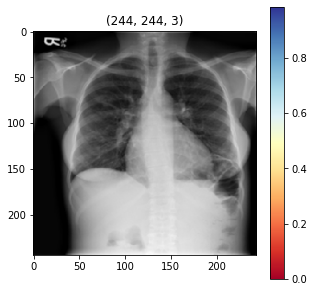

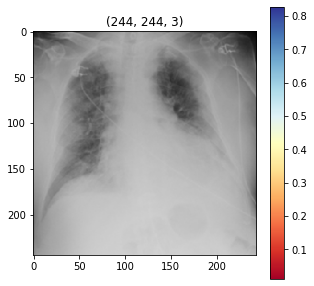

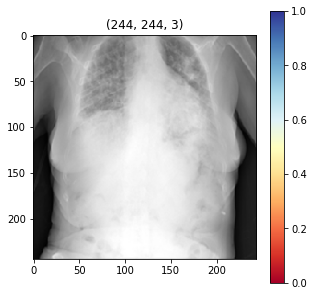

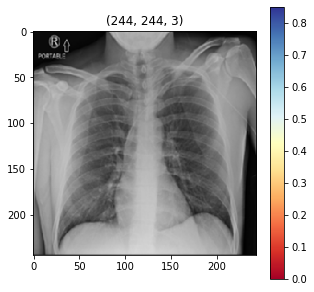

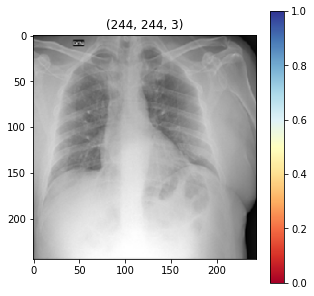

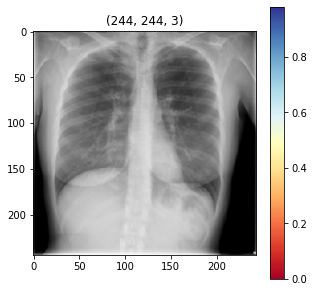

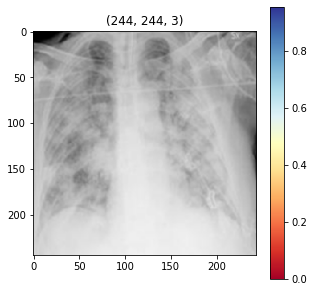

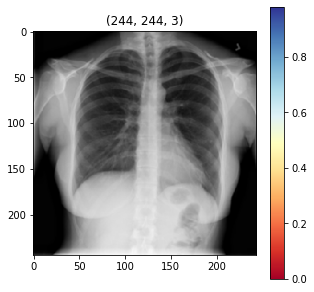

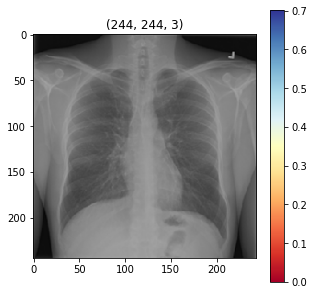

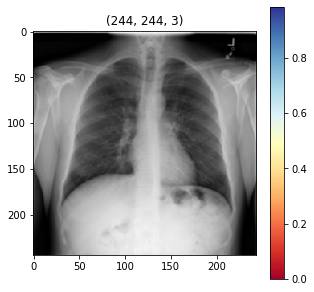

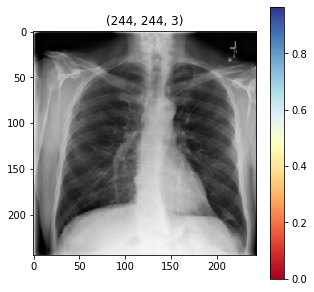

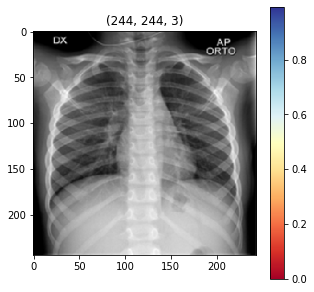

In [17]:
#calling the function to plot 
plotImages(t_img, label)

In [18]:
#generating the test image
test_generator=TEST_DATASET.flow_from_directory(directory=TEST_PATH,target_size=(244,244))

Found 1000 images belonging to 2 classes.


In [19]:
#checking for the classes 
test_generator.class_indices

{'covid': 0, 'normal': 1}

In [20]:
#splitting test image and classes
t_img , label = test_generator.next()

In [21]:
#function to print the test images
def plotImages(img_arr, label):

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'RdYlBu')
    plt.colorbar()
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    

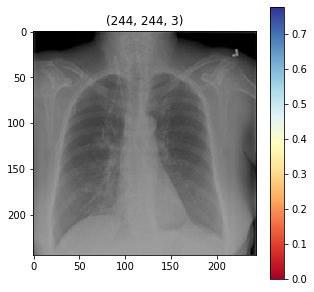

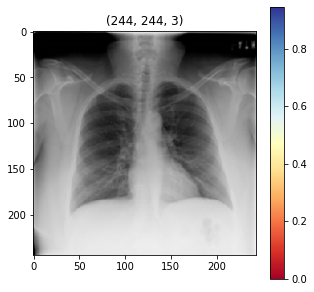

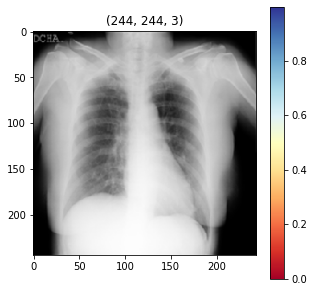

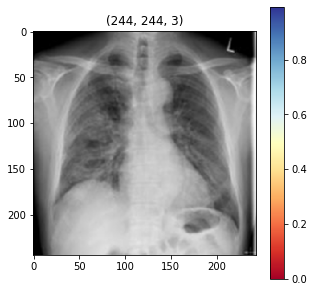

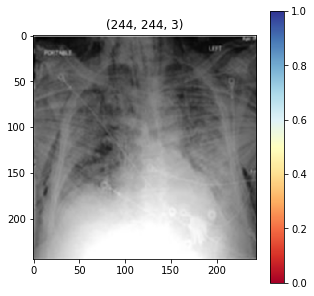

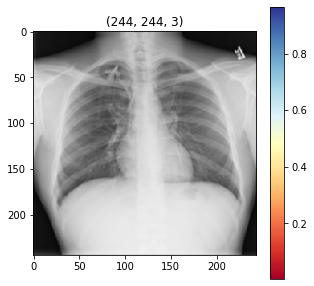

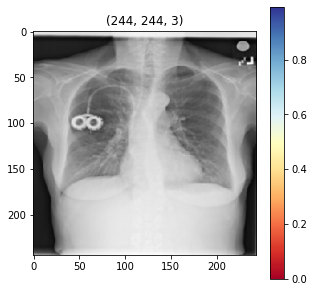

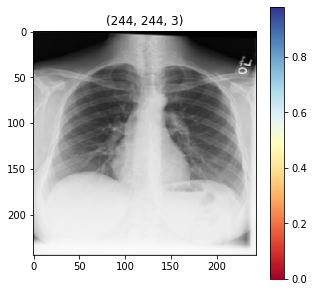

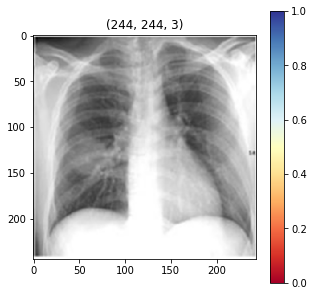

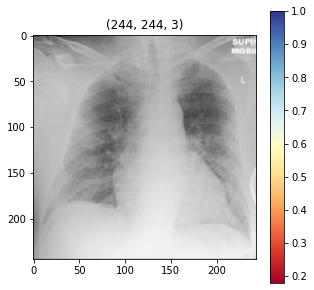

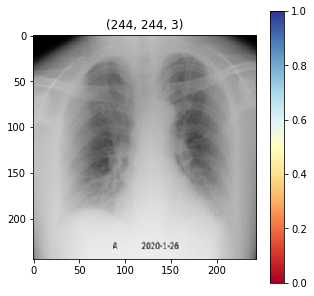

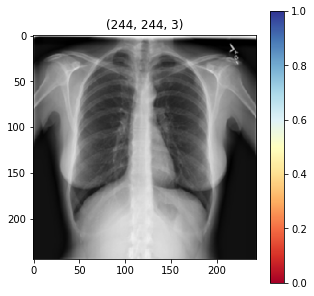

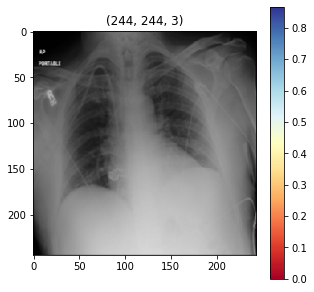

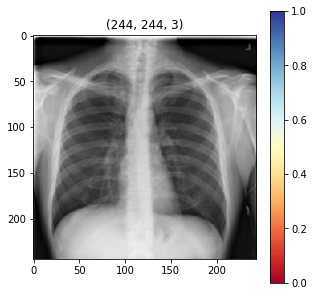

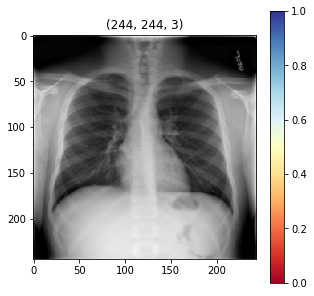

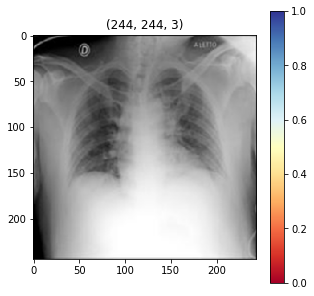

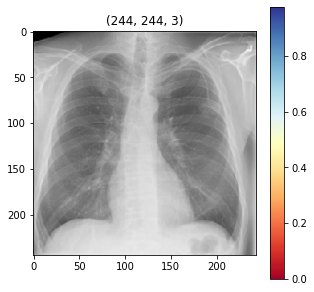

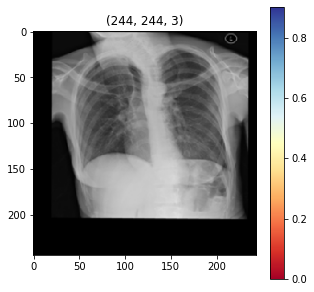

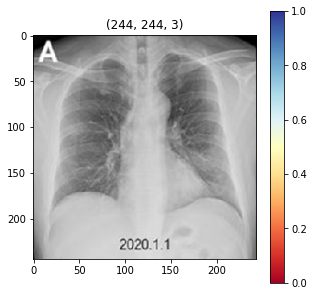

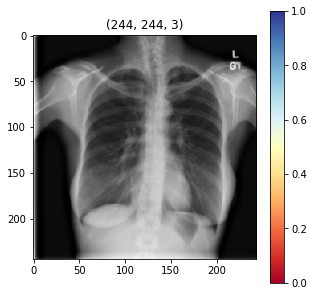

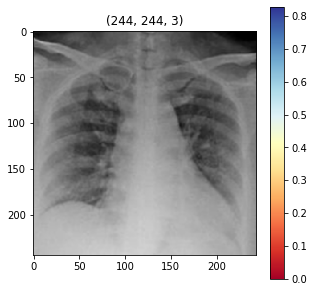

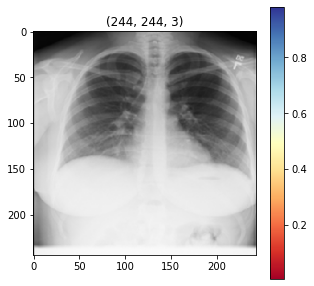

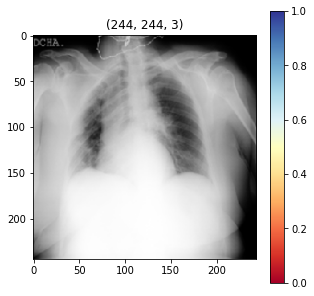

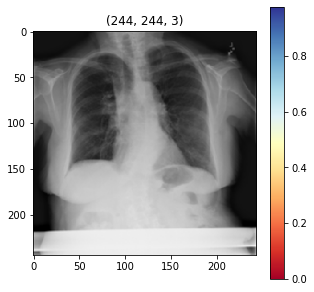

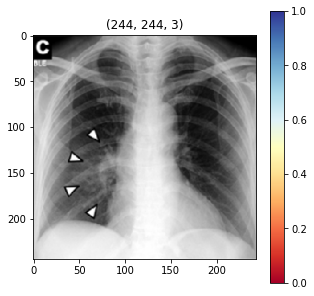

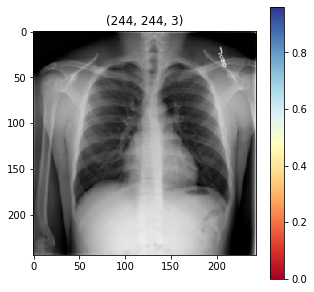

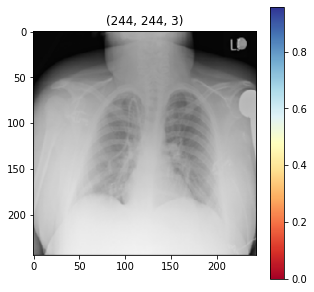

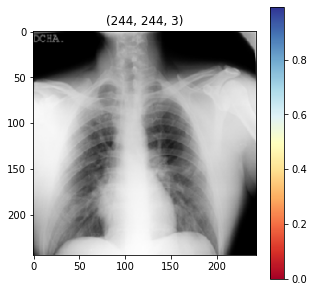

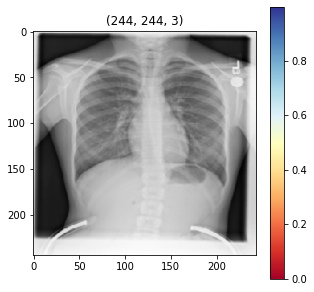

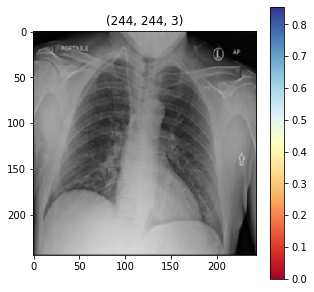

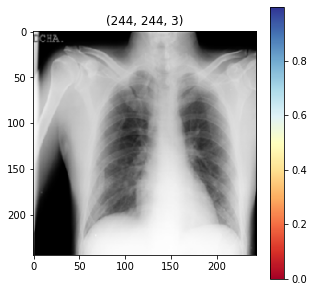

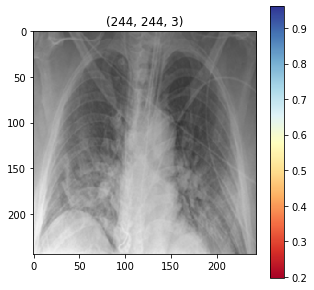

In [22]:
#printing the images
plotImages(t_img, label)

In [23]:
#declaring the stoping point and checkpint for the best model performance
es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 15, verbose=1)
mc = ModelCheckpoint(filepath="My_innocent_best_model_version1.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [24]:
#fitting the model to the train data and validation data
hist=model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[es,mc],
    validation_steps=5,
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
50/50 [==============================] - 64s 582ms/step - loss: 0.8733 - accuracy: 0.5094 - val_loss: 0.6920 - val_accuracy: 0.5437

Epoch 00001: val_accuracy improved from -inf to 0.54375, saving model to My_innocent_best_model_version1.h5
Epoch 2/100
50/50 [==============================] - 31s 620ms/step - loss: 0.6382 - accuracy: 0.6401 - val_loss: 0.6031 - val_accuracy: 0.7000

Epoch 00002: val_accuracy improved from 0.54375 to 0.70000, saving model to My_innocent_best_model_version1.h5
Epoch 3/100
50/50 [==============================] - 29s 576ms/step - loss: 0.5948 - accuracy: 0.6759 - val_loss: 0.5993 - val_accuracy: 0.7063

Epoch 00003: val_accuracy improved from 0.70000 to 0.70625, saving model to My_innocent_best_model_version1.h5
Epoch 4/100
50/50 [==============================] - 29s 579ms/step - loss: 0.5517 - accuracy: 0.7244 - val_loss: 0.6223 - val_accuracy: 0.6687

Epoch 00004: val_accuracy did not improve from 0.70625
Epoch 5/100
50/50 [================

In [25]:
#Evaluate the performance of the model for training images 
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.307349294424057, 0.8475714325904846]

In [26]:
#Evaluate the performance of the model for testing images 
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.40594595670700073, 0.7730000019073486]

In [27]:
# checking out the accuracy of model by test images 

acc = model.evaluate_generator(generator= test_generator)[1]
print(f"The accuracy of your model is = {acc} %")

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


The accuracy of your model is = 0.746999979019165 %


In [28]:
#loading the best model
model=load_model("/content/My_innocent_best_model_version1.h5")

In [29]:
#checking the history of evaluation performance of the model during training 
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

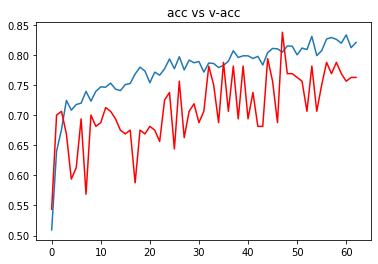

In [30]:
#ploting the relationship between accuracy and validation accuracy
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()


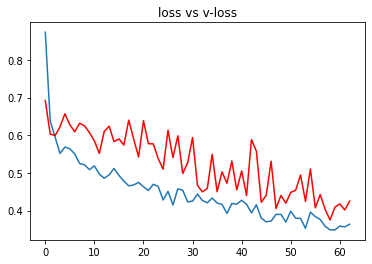

In [31]:
#plotting the relation between loss and valid loss 
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()


In [32]:
#assigning the class type 
class_type = {0:'Covid',  1 : 'Normal'}

<h2>MAKING PREDICTION<h2>

In [33]:
#function to get the image to make prediction
def get_image(img_path):
  img=img_path
  img=image.load_img(img,target_size=(244,244,3))
  img=image.img_to_array(img)/255
  img=np.array([img])
  #img = np.expand_dims(img, axis=0)
  return img 


In [34]:
#path of the images
path="/content/DATASET_COVID-19_DETECTION_BY_CNN__dataset_version2/Test/normal/Normal-4505.png"
img=get_image(path)

In [35]:
#checking the shape
img.shape 

(1, 244, 244, 3)

In [36]:
#making prediction
preds=model.predict(img)

In [37]:
#checking prediction
preds

array([[0.5286418 , 0.46490097]], dtype=float32)

In [38]:
#checking and detecting the class type of the image
result=class_type[np.argmax(preds)]


In [39]:
#print the class type
print(f"PREDICTION CLASS : {result}")

PREDICTION CLASS : Covid


In [40]:
#printing the chance of having covid-19
print(f"The chances of image being Covid is : {preds[0][0]*100} percent")


The chances of image being Covid is : 52.864181995391846 percent


In [41]:
#checking the chance of being normal
print(f"The chances of image being Normal is : {preds[0][1]*100} percent") 


The chances of image being Normal is : 46.49009704589844 percent


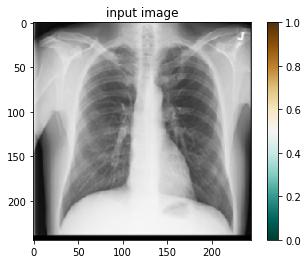

In [42]:
#showing the images given
plt.imshow(img[0], cmap = "BrBG_r")
plt.title("input image")
plt.colorbar()
plt.show()


In [43]:
#making prediction and drawing the confusion matrix 
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred ,axis =1)
print('Confusion Matrix')
confusion_matrix = confusion_matrix(test_generator.classes,y_pred)
print(confusion_matrix)
print('Classification Report')
target_names = ['normal', 'covid']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[348 152]
 [372 128]]
Classification Report
              precision    recall  f1-score   support

      normal       0.48      0.70      0.57       500
       covid       0.46      0.26      0.33       500

    accuracy                           0.48      1000
   macro avg       0.47      0.48      0.45      1000
weighted avg       0.47      0.48      0.45      1000



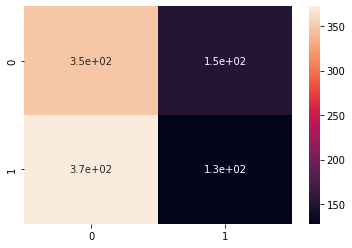

In [44]:
#confusion matrix
sns.heatmap(confusion_matrix, annot = True)

In [45]:
# Let's now calculate the specificity and sensitivity
TP = confusion_matrix[1][1]
TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
print('TP ==> {} \nTN ==> {} \n FP ==> {}\n FN ==> {}'.format(TP, TN, FP, FN))

TP ==> 128 
TN ==> 348 
 FP ==> 152
 FN ==> 372


In [46]:
#checking the sensitivity and specificity
sensitivity = round(((TP / float(TP + FN)) * 100), 2)
specificity = round(((TN / float(TN + FP)) * 100), 2)
print('Our model has a sensitivity of {} % and specificity of {} %'.format(sensitivity, specificity))

Our model has a sensitivity of 25.6 % and specificity of 69.6 %
